In [1]:
import optimization_SPDC
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax.scipy.optimize as jax_opt
import get_initialization_cond as init_value

key = jax.random.PRNGKey(0)
np.random.seed(0)
#use tqdm

# Initialize the parameters to build U matrix

In [12]:
# power of the pump (if too high, may affect the loss function(increasing loss))
Np = 0.02
# create the frequency matrix ω-ω_mean (maybe also influences the quality of the backprop)
N = 401
wi = -10
wf = 10
x = np.linspace(wi, wf, N)
l = 1
alpha, G, H = init_value.get_constants(l, wi, wf, Np, N)

# Initialize the desired value for mean pair number (N) and Schmidt number (K)

In [13]:
y_N = 0.01
y_K = 1

# Initializing with a gaussian pump

In [14]:
# if initialized with imaginary part not equal to real, can get a certain phase
# here the initial imaginary part is 5 times the initial real part
a = []
a.append(0.02*jnp.exp(-(jnp.linspace(2*wi, 2*wf, 2*N))**2)/2)
a.append(0.1*jnp.exp(-(jnp.linspace(2*wi, 2*wf, 2*N))**2)/2)
a = jnp.array(a)
a = jnp.reshape(a, 2*len(a[0]))
optimized = jax_opt.minimize(optimization_SPDC.get_total_loss, a, args = (N, alpha, G, H, l, y_N, y_K), method = "BFGS")

In [15]:
optimized_a = optimized.x
complex_opt_a = optimization_SPDC.get_complex_array(optimized_a)
complex_a = optimization_SPDC.get_complex_array(a)

# Initializing with infinite bandwidth

In [ ]:
a = 0.1*jnp.ones(4*N)
optimized = jax_opt.minimize(get_total_loss, a, args = (N, alpha, G, H, l, y_N, y_K), method = "BFGS")

In [22]:
optimized_a = optimized.x
complex_opt_a = optimization_SPDC.get_complex_array(optimized_a)
complex_a = optimization_SPDC.get_complex_array(a)

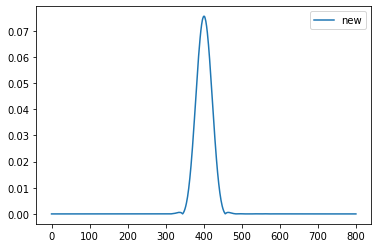

In [17]:
# in low gain regime, the pump obtained with BFGS is not the same as the theorical best value, because the N value always deviate from the set value. Need more investigation
#plt.plot((max(np.abs(complex_opt_a))/max(np.abs(complex_a)))*np.abs(complex_a),label = "old")
plt.plot(np.abs(complex_opt_a), label = "new")
plt.legend()

# Show the JSA power map 

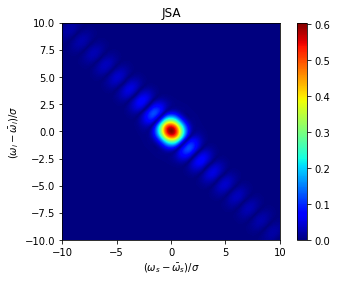

In [7]:
JSA = optimization_SPDC.get_JSA(x, optimized_a, N, alpha, G, H, l)
fig, ax = plt.subplots()
im = ax.imshow(JSA, cmap="jet", origin="lower",extent=[x[0],x[N-1],x[0],x[N-1]])
ax.set_title("JSA")
ax.set_xlabel(r"$(\omega_{s}-\bar{\omega}_{s})/\sigma$")
ax.set_ylabel(r"$(\omega_{i}-\bar{\omega}_{i})/\sigma$")
plt.colorbar(im, orientation="vertical")
plt.show()

# Show the pump envelopp

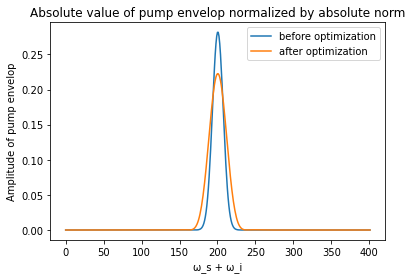

In [8]:
plt.title("Absolute value of pump envelop normalized by absolute norm")
plt.xlabel("ω_s + ω_i")
plt.ylabel("Amplitude of pump envelop")
plt.plot(jnp.abs(complex_a/(jnp.linalg.norm(complex_a))), label = "before optimization")
plt.plot(jnp.abs(complex_opt_a/(jnp.linalg.norm(complex_opt_a))), label = "after optimization")
plt.legend()

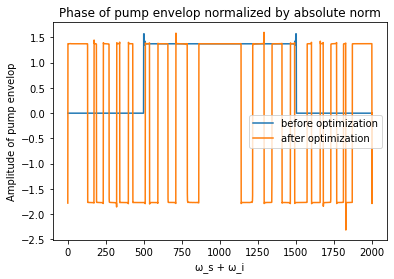

In [27]:
plt.title("Phase of pump envelop normalized by absolute norm")
plt.xlabel("ω_s + ω_i")
plt.ylabel("Amplitude of pump envelop")
plt.plot(jnp.angle(complex_a/(jnp.linalg.norm(complex_a))), label = "before optimization")
plt.plot(jnp.angle(complex_opt_a/(jnp.linalg.norm(complex_opt_a))), label = "after optimization")
plt.legend()

In [18]:
optimization_SPDC.get_observables(optimized_a, N, alpha, G, H, l)

(DeviceArray(0.03403255, dtype=float32), DeviceArray(1.2128488, dtype=float32))